In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from h_test_IQM.pipeline import get_scores
from h_test_IQM.pipeline.main import plot_hist, samples_to_pdf
from tqdm import tqdm

In [2]:
all_cifar_KL = []
for i in tqdm(range(10)):
    _, _, res = get_scores(
        dataset_target='CIFAR_10',
        dataset_test='CIFAR_10',
        # test_labels=[0, 1],
        transform_test='gaussian_noise',
        scorer='entropy-2-mse',
        test='KL',
        dev=False,
        dataset_proportion=0.1,
        seed=i,
        _print=False
    )
    all_cifar_KL.append(res['KL'])

100%|██████████| 10/10 [00:41<00:00,  4.19s/it]


In [14]:
one_class_CIFAR = []
for i in tqdm(range(10)):
    _, _, res = get_scores(
        dataset_target='CIFAR_10',
        dataset_test='CIFAR_10',
        target_labels=[0, 1],
        test_labels=[0, 1],
        transform_test='gaussian_noise',
        scorer='entropy-2-mse',
        test='KL',
        dev=False,
        dataset_proportion=0.1,
        seed=i,
        _print=False
    )
    one_class_CIFAR.append(res['KL'])

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


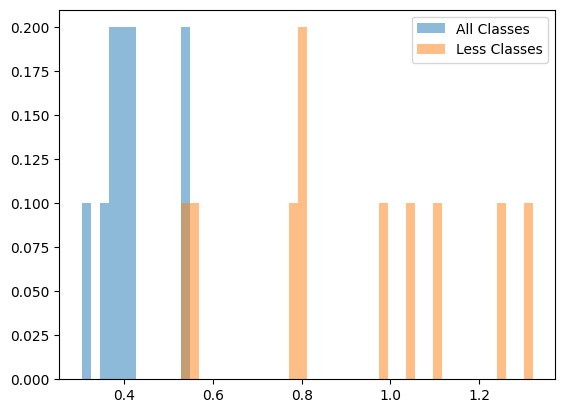

In [15]:
one_class_CIFAR = np.array(one_class_CIFAR)
all_cifar_KL = np.array(all_cifar_KL)
dist_all, dist_one, all_bins, one_bins = samples_to_pdf(
    all_cifar_KL, one_class_CIFAR, num_bins=50)
plot_hist(dist_all, all_bins, name='All Classes')
plot_hist(dist_one, one_bins, name='Less Classes')
plt.legend()
plt.show()